In [32]:
import pandas as pd
import numpy as np
%matplotlib inline

In [33]:
from statsmodels.tsa.ar_model import AR, ARResults

In [34]:
df = pd.read_csv(r'..\Data\uspopulation.csv', index_col='DATE', parse_dates=True)

In [35]:
df.index.freq = 'MS'

In [36]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


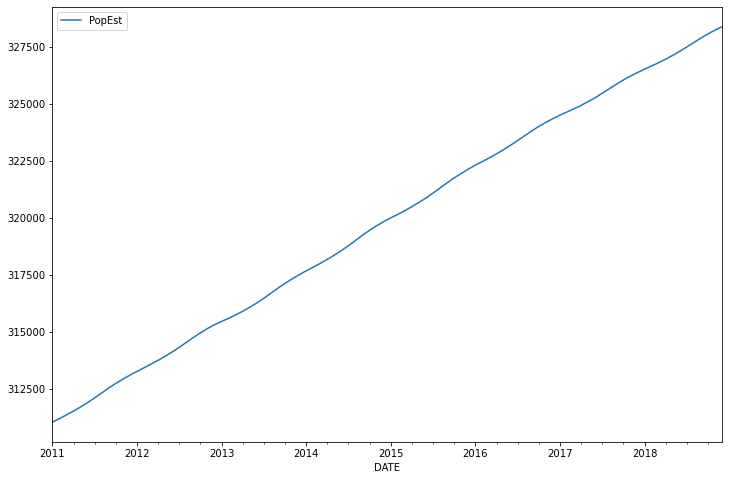

In [37]:
df.plot(figsize=(12, 8));

In [38]:
len(df)

96

In [39]:
96-12

84

In [40]:
train = df.iloc[:84]

In [41]:
test = df.iloc[84:]

In [42]:
import warnings
warnings.filterwarnings('ignore')

In [43]:
model = AR(train['PopEst'])

In [44]:
AR1fit = model.fit(maxlag=1)

In [45]:
AR1fit.k_ar

1

In [46]:
AR1fit.params

const        284.913797
L1.PopEst      0.999686
dtype: float64

In [47]:
start = len(train)

In [48]:
end = len(train) + len(test) - 1

In [49]:
start

84

In [50]:
end

95

In [51]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [52]:
predictions1 = AR1fit.predict(start=start, end=end)

In [53]:
predictions1 = predictions1.rename('AR(1) Predictions')

In [54]:
predictions1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: AR(1) Predictions, dtype: float64

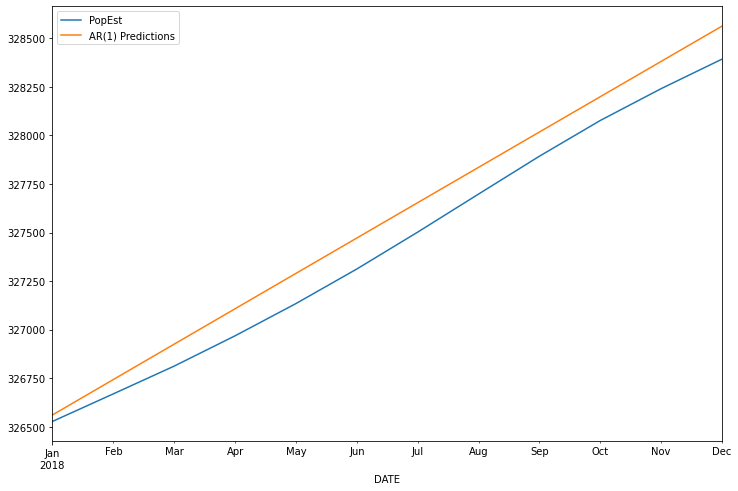

In [55]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True);

In [57]:
model = AR(train['PopEst'])
AR2fit = model.fit(maxlag=2)

In [58]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [59]:
predictions2 = AR2fit.predict(start=start, end=end)

In [60]:
predictions2 = predictions2.rename('AR (2) Predictions')

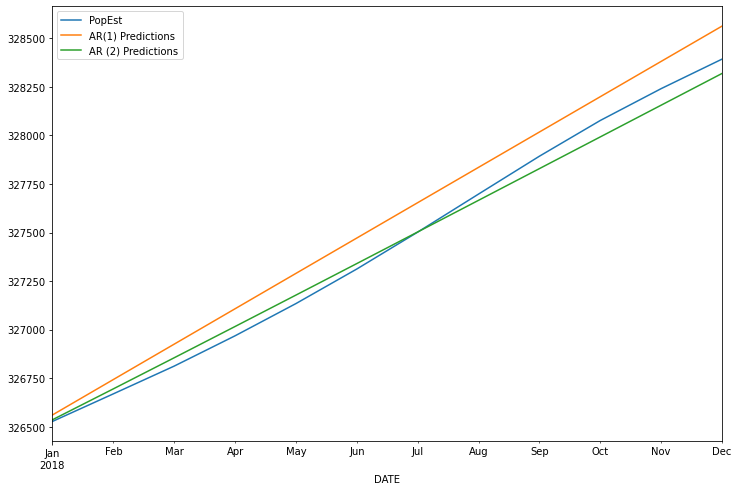

In [61]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True);


In [62]:
model = AR(train['PopEst'])
ARfit = model.fit(ic='t-stat')


In [63]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [66]:
predictions8 = ARfit.predict(start, end)
predictions8 = predictions8.rename('AR (8) Predictions')

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
labels = ['AR1', 'AR2', 'AR8']

In [69]:
preds = [predictions1, predictions2, predictions8]

In [72]:
for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} error MSE was: {error}')

AR1 error MSE was: 17449.71423587912
AR2 error MSE was: 2713.258667805521
AR8 error MSE was: 186.9783771797175


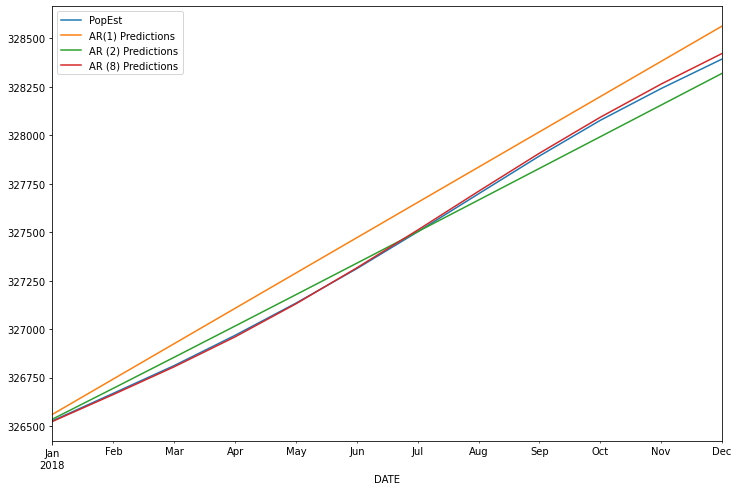

In [73]:
test.plot(figsize=(12, 8), legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions8.plot(legend=True);

In [74]:
#FORECASTING FUTURE!

model = AR(df['PopEst'])

ARfit = model.fit() #do not set maxlags, incase lag value changes when training on full dataset

forcasted_values = ARfit.predict(start=len(df), end=len(df)+12).rename('Forecast')

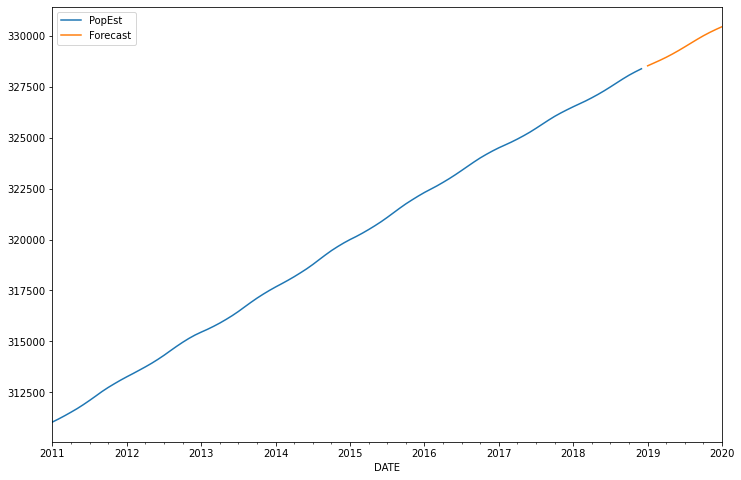

In [77]:
df['PopEst'].plot(figsize=(12, 8), legend=True)
forcasted_values.plot(legend=True);